Name: Siddhi Pravin Lipare  
Roll no. 21262

# Part 1: Wine Dataset

Q1:

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [3]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
print("\nData Summary:")
wine_df


Data Summary:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
print("\nStatistical Summary:")
wine_df.describe()


Statistical Summary:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Q2:

In [5]:
print("\nFeature Names:")
wine.feature_names


Feature Names:


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
print("\nTarget Names:")
wine.target_names


Target Names:


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Q3:

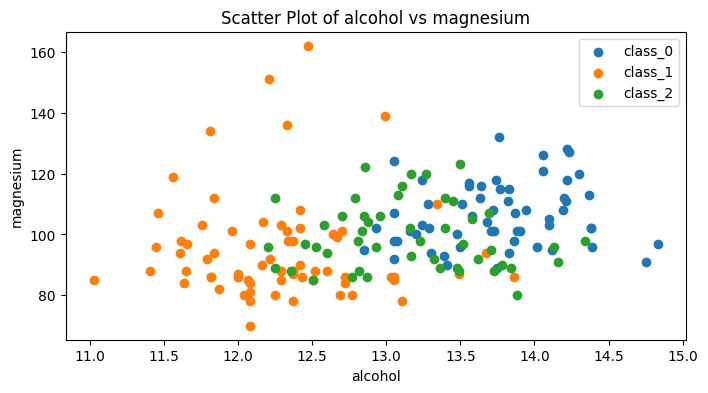

In [7]:
feature1 = 'alcohol'
feature2 = 'magnesium'

# Scatter plot
plt.figure(figsize=(8, 4))
for target_value in wine.target_names:
    subset_targets = wine_df[wine_df['target'] == wine.target_names.tolist().index(target_value)]
    plt.scatter(subset_targets[feature1], subset_targets[feature2], label=target_value)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.legend()
plt.show()

Q4:

Explained Variance for 2 components: [0.99809123 0.00173592]
Explained Variance for 3 components: [9.98091230e-01 1.73591562e-03 9.49589576e-05]


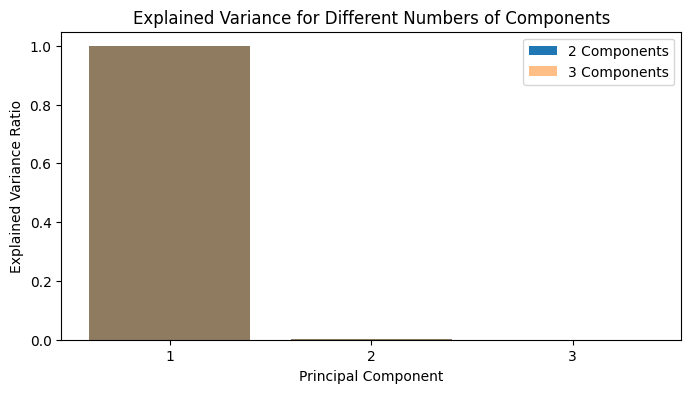

In [8]:
from sklearn.decomposition import PCA

# Separate the features and target
X = wine_df.drop('target', axis=1)

# Step 1: Perform PCA for p1 components
p1 = 2
pca1 = PCA(n_components=p1)
X_pca1 = pca1.fit_transform(X)

# Step 2: Perform PCA for p2 components
p2 = 3
pca2 = PCA(n_components=p2)
X_pca2 = pca2.fit_transform(X)

# Step 3: Calculate the explained variances for p1 and p2 components
explained_var_ratio1 = pca1.explained_variance_ratio_
explained_var_ratio2 = pca2.explained_variance_ratio_

print(f"Explained Variance for {p1} components: {explained_var_ratio1}")
print(f"Explained Variance for {p2} components: {explained_var_ratio2}")

plt.figure(figsize=(8, 4))
plt.bar(range(1, p1 + 1), explained_var_ratio1, label=f'{p1} Components')
plt.bar(range(1, p2 + 1), explained_var_ratio2, label=f'{p2} Components', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Different Numbers of Components')
plt.xticks(range(1, max(p1, p2) + 1))
plt.legend()
plt.show()

Q5:

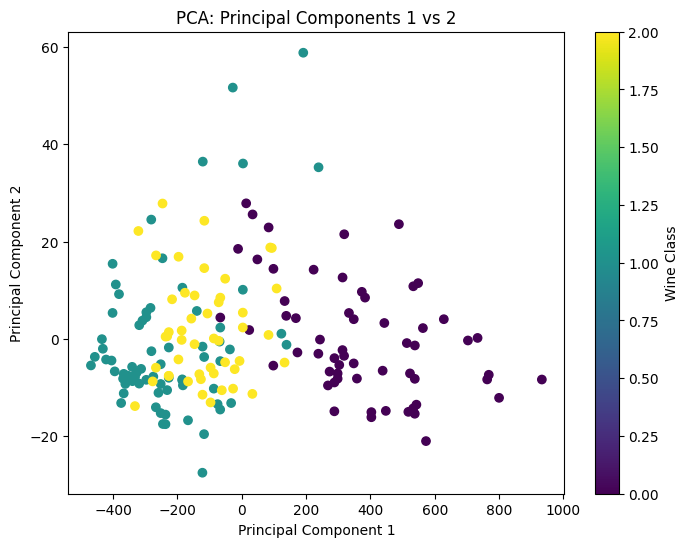

In [9]:
p1_pca_df = pd.DataFrame(data=X_pca1, columns=[f'PCA_{i+1}' for i in range(p1)])
p2_pca_df = pd.DataFrame(data=X_pca2, columns=[f'PCA_{i+1}' for i in range(p2)])

# Plotting the first two components for p1
plt.figure(figsize=(8, 6))
plt.scatter(p1_pca_df['PCA_1'], p1_pca_df['PCA_2'], c=wine_df['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components 1 vs 2')
plt.colorbar(label='Wine Class')
plt.show()

Q6:

Feeding the 2 features in Random Forest Classifier:

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train_p1, X_test_p1, y_train, y_test = train_test_split(p1_pca_df, wine_df['target'], test_size=0.2, random_state=42)
X_train_p2, X_test_p2, _, _ = train_test_split(p2_pca_df, wine_df['target'], test_size=0.2, random_state=42)

# Random Forest Classifier for p1 components
rf_p1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_p1.fit(X_train_p1, y_train)
y_pred_p1 = rf_p1.predict(X_test_p1)

# Random Forest Classifier for p2 components
rf_p2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_p2.fit(X_train_p2, y_train)
y_pred_p2 = rf_p2.predict(X_test_p2)

# Accuracy for both the cases
accuracy_p1 = accuracy_score(y_test, y_pred_p1)
accuracy_p2 = accuracy_score(y_test, y_pred_p2)

print(f"Random Forest Accuracy for p1 components: {accuracy_p1:.2f}")
print(f"Random Forest Accuracy for p2 components: {accuracy_p2:.2f}")

print("Classification Report for p1 components:")
print(classification_report(y_test, y_pred_p1, target_names=wine.target_names))

print("Classification Report for p2 components:")
print(classification_report(y_test, y_pred_p2, target_names=wine.target_names))

Random Forest Accuracy for p1 components: 0.75
Random Forest Accuracy for p2 components: 0.92
Classification Report for p1 components:
              precision    recall  f1-score   support

     class_0       0.92      0.86      0.89        14
     class_1       0.73      0.79      0.76        14
     class_2       0.50      0.50      0.50         8

    accuracy                           0.75        36
   macro avg       0.72      0.71      0.72        36
weighted avg       0.76      0.75      0.75        36

Classification Report for p2 components:
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       0.86      0.75      0.80         8

    accuracy                           0.92        36
   macro avg       0.91      0.89      0.90        36
weighted avg       0.92      0.92      0.92        36



Feeding the two features in Naive Bayes Classifier:

In [11]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier for p1 components
nb_p1 = GaussianNB()
nb_p1.fit(X_train_p1, y_train)
y_pred_nb_p1 = nb_p1.predict(X_test_p1)

# Naive Bayes Classifier for p2 components
nb_p2 = GaussianNB()
nb_p2.fit(X_train_p2, y_train)
y_pred_nb_p2 = nb_p2.predict(X_test_p2)

# Accuracy for both the cases
accuracy_nb_p1 = accuracy_score(y_test, y_pred_nb_p1)
accuracy_nb_p2 = accuracy_score(y_test, y_pred_nb_p2)

print(f"Naive Bayes Accuracy for p1 components: {accuracy_nb_p1:.2f}")
print(f"Naive Bayes Accuracy for p2 components: {accuracy_nb_p2:.2f}")

print("Classification Report for Naive Bayes (p1 components):")
print(classification_report(y_test, y_pred_nb_p1, target_names=wine.target_names))

print("Classification Report for Naive Bayes (p2 components):")
print(classification_report(y_test, y_pred_nb_p2, target_names=wine.target_names))


Naive Bayes Accuracy for p1 components: 0.83
Naive Bayes Accuracy for p2 components: 0.89
Classification Report for Naive Bayes (p1 components):
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.85      0.79      0.81        14
     class_2       0.62      0.62      0.62         8

    accuracy                           0.83        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.83      0.83      0.83        36

Classification Report for Naive Bayes (p2 components):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       0.86      0.86      0.86        14
     class_2       0.75      0.75      0.75         8

    accuracy                           0.89        36
   macro avg       0.87      0.87      0.87        36
weighted avg       0.89      0.89      0.89        36



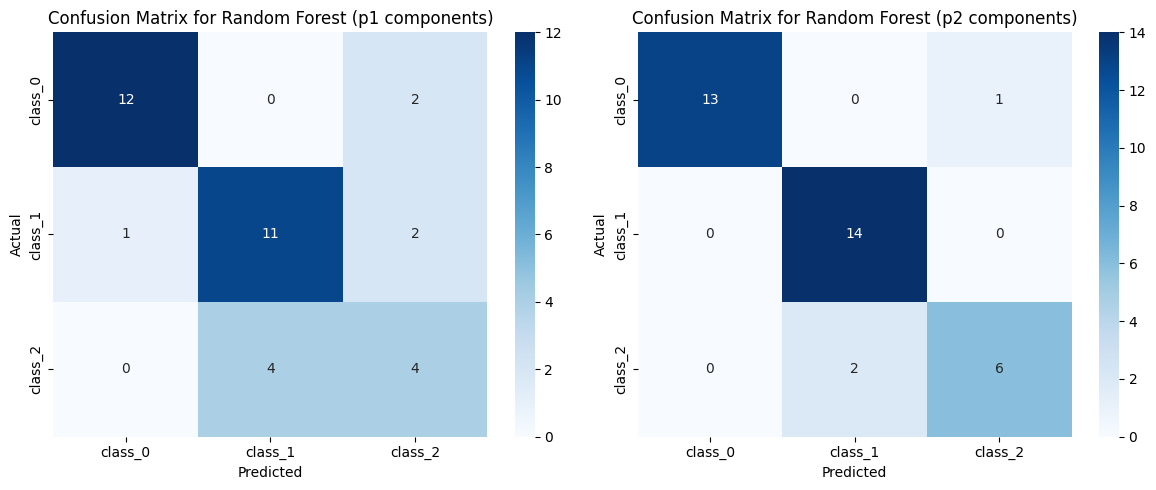

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for Random Forest (p1 components)
confusion_rf_p1 = confusion_matrix(y_test, y_pred_p1)

# Calculate the confusion matrix for Random Forest (p2 components)
confusion_rf_p2 = confusion_matrix(y_test, y_pred_p2)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_rf_p1, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (p1 components)')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_rf_p2, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (p2 components)')

plt.tight_layout()
plt.show()


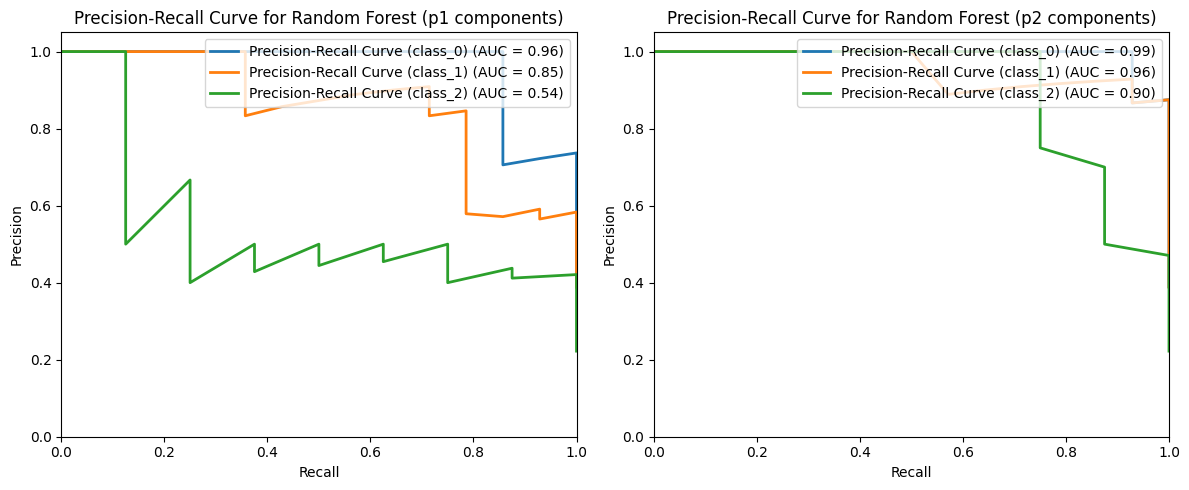

In [16]:
from sklearn.metrics import auc, precision_recall_curve

# Get the probabilities for each class (one-vs-all)
probs_rf_p1 = rf_p1.predict_proba(X_test_p1)
probs_rf_p2 = rf_p2.predict_proba(X_test_p2)

# Initialize lists to store the precision-recall curve data
precision_rf_p1 = []
recall_rf_p1 = []
pr_auc_rf_p1 = []

precision_rf_p2 = []
recall_rf_p2 = []
pr_auc_rf_p2 = []

for i in range(len(wine.target_names)):

    # Compute precision-recall curve and AUC for each class (p1 components)
    precision, recall, _ = precision_recall_curve(y_test == i, probs_rf_p1[:, i])
    precision_rf_p1.append(precision)
    recall_rf_p1.append(recall)
    pr_auc_rf_p1.append(auc(recall, precision))

    # Compute precision-recall curve and AUC for each class (p2 components)
    precision, recall, _ = precision_recall_curve(y_test == i, probs_rf_p2[:, i])
    precision_rf_p2.append(precision)
    recall_rf_p2.append(recall)
    pr_auc_rf_p2.append(auc(recall, precision))

# Plot Precision-Recall curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(len(wine.target_names)):
    plt.plot(recall_rf_p1[i], precision_rf_p1[i], lw=2, label=f'Precision-Recall Curve ({wine.target_names[i]}) (AUC = {pr_auc_rf_p1[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest (p1 components)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
for i in range(len(wine.target_names)):
    plt.plot(recall_rf_p2[i], precision_rf_p2[i], lw=2, label=f'Precision-Recall Curve ({wine.target_names[i]}) (AUC = {pr_auc_rf_p2[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest (p2 components)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


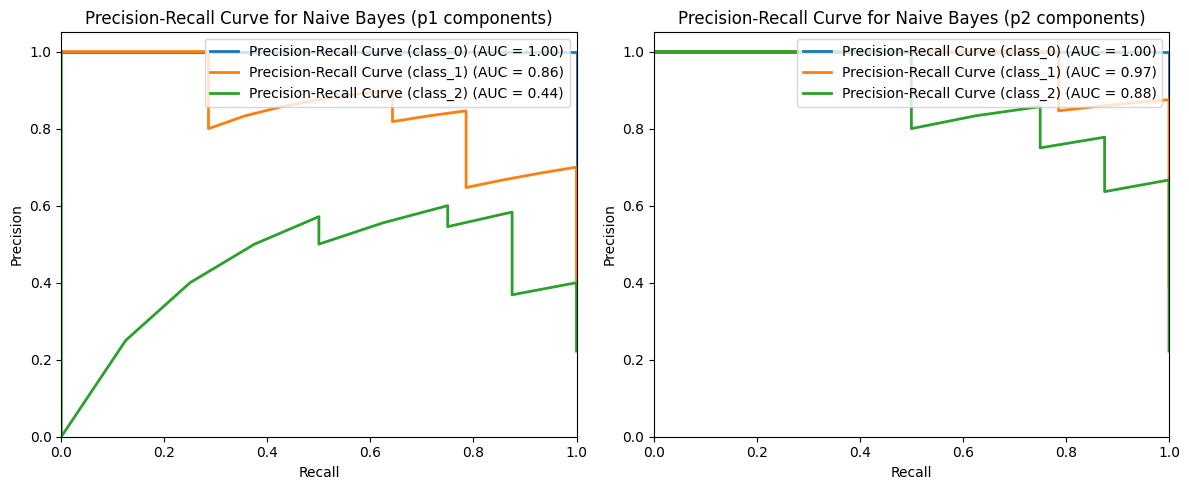

In [14]:
# Calculate the probabilities for each class (one-vs-all) for Naive Bayes
probs_nb_p1 = nb_p1.predict_proba(X_test_p1)
probs_nb_p2 = nb_p2.predict_proba(X_test_p2)

# Initialize lists to store the precision-recall curve data
precision_nb_p1 = []
recall_nb_p1 = []
pr_auc_nb_p1 = []

precision_nb_p2 = []
recall_nb_p2 = []
pr_auc_nb_p2 = []

for i in range(len(wine.target_names)):
    # Compute precision-recall curve and AUC for each class (p1 components)
    precision, recall, _ = precision_recall_curve(y_test == i, probs_nb_p1[:, i])
    precision_nb_p1.append(precision)
    recall_nb_p1.append(recall)
    pr_auc_nb_p1.append(auc(recall, precision))

    # Compute precision-recall curve and AUC for each class (p2 components)
    precision, recall, _ = precision_recall_curve(y_test == i, probs_nb_p2[:, i])
    precision_nb_p2.append(precision)
    recall_nb_p2.append(recall)
    pr_auc_nb_p2.append(auc(recall, precision))

# Plot Precision-Recall curves for Naive Bayes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(len(wine.target_names)):
    plt.plot(recall_nb_p1[i], precision_nb_p1[i], lw=2, label=f'Precision-Recall Curve ({wine.target_names[i]}) (AUC = {pr_auc_nb_p1[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes (p1 components)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
for i in range(len(wine.target_names)):
    plt.plot(recall_nb_p2[i], precision_nb_p2[i], lw=2, label=f'Precision-Recall Curve ({wine.target_names[i]}) (AUC = {pr_auc_nb_p2[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes (p2 components)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

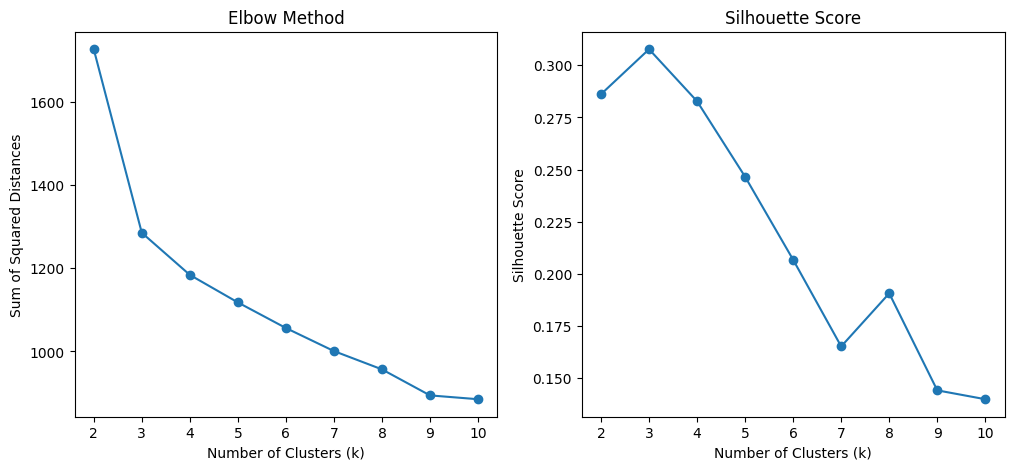

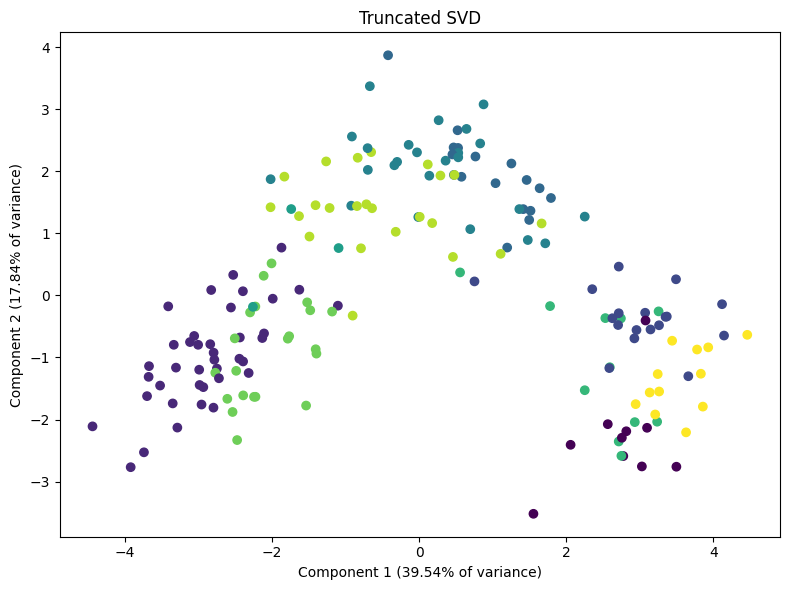

In [15]:
from sklearn.decomposition import TruncatedSVD

# Standardize the data (important for K-means)
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine_df)

# Perform K-means clustering with a varying number of clusters
k_values = range(2, 11)
inertia = []  # to store the sum of squared distances
silhouette_scores = []  # to store silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_std)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(wine_std, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Perform Truncated SVD
n_components = 2  # Number of components for SVD
svd = TruncatedSVD(n_components=n_components)
wine_svd = svd.fit_transform(wine_std)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(wine_svd[:, 0], wine_svd[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel(f'Component 1 ({svd.explained_variance_ratio_[0]*100:.2f}% of variance)')
plt.ylabel(f'Component 2 ({svd.explained_variance_ratio_[1]*100:.2f}% of variance)')
plt.title('Truncated SVD')

plt.tight_layout()
plt.show()


# Conclusion:    
In our analysis of the Wine dataset, we started by loading the chemical analysis
data of wines and performed PCA to reduce dimensionality. Next, we employed Random
Forest and Naive Bayes classifiers to classify the wines based on PCA-transformed
features. We assessed their accuracy and precision-recall metrics for two PCA scenarios (p1 and p2).

For cluster analysis, we applied K-means to the dataset using all features and determined
the optimal number of clusters via the Elbow Method and Silhouette Score.
We visualized the data using Truncated Singular Value Decomposition, revealing natural groupings
and patterns in the data. These techniques are crucial for pattern recognition and data exploration,
serving applications from quality control in the wine industry to exploratory research.

# Part 2: Wisconsin Dataset

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score

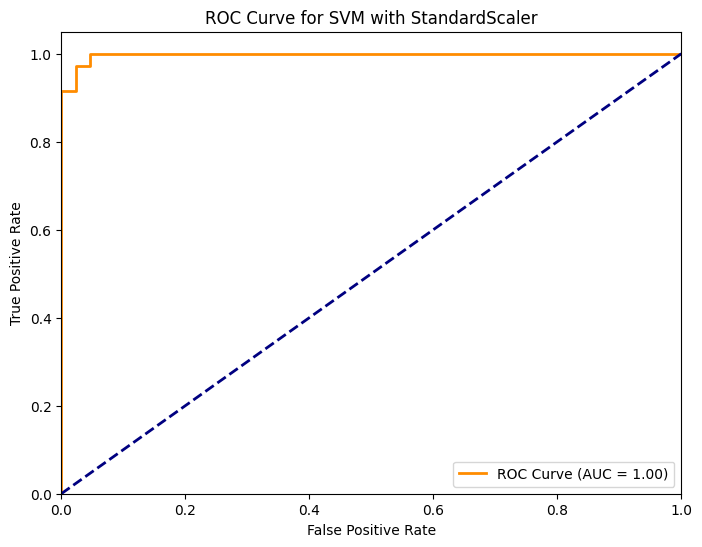

SVM with StandardScaler Scaling:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1 Score: 0.99
AUC Score: 1.00
Cross-Validation Accuracy: 0.97



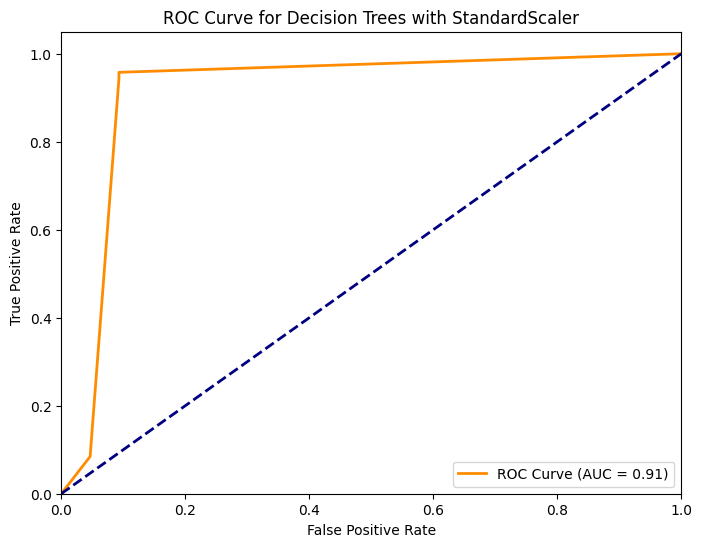

Decision Trees with StandardScaler Scaling:
Accuracy: 0.94
Precision: 0.94
Recall: 0.96
F1 Score: 0.95
AUC Score: 0.91
Cross-Validation Accuracy: 0.93



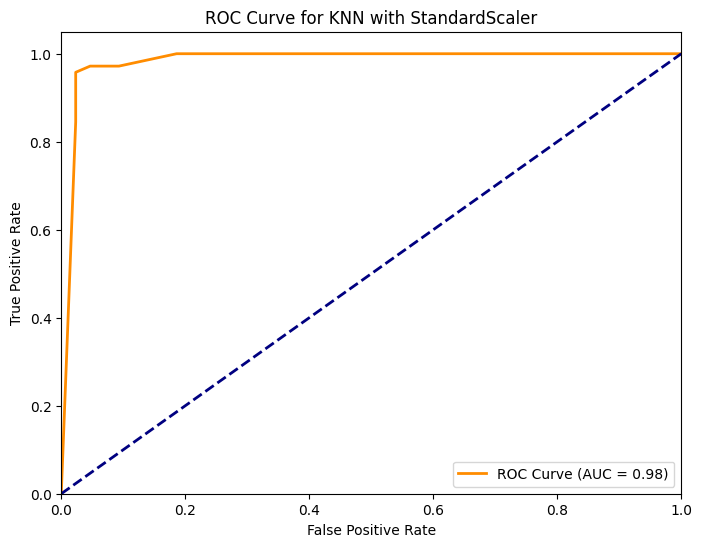

KNN with StandardScaler Scaling:
Accuracy: 0.96
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
AUC Score: 0.98
Cross-Validation Accuracy: 0.96



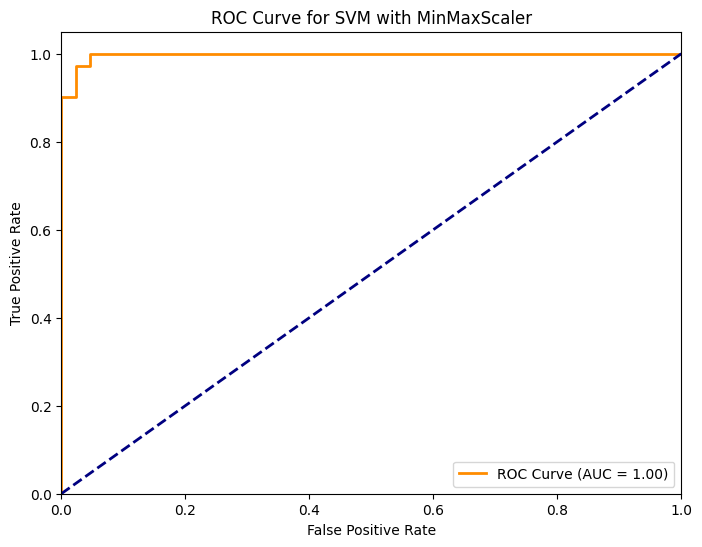

SVM with MinMaxScaler Scaling:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
AUC Score: 1.00
Cross-Validation Accuracy: 0.98



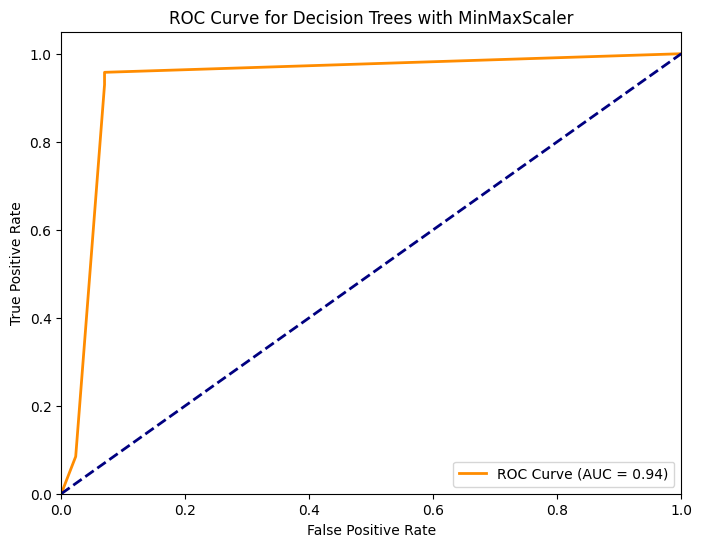

Decision Trees with MinMaxScaler Scaling:
Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
AUC Score: 0.94
Cross-Validation Accuracy: 0.94



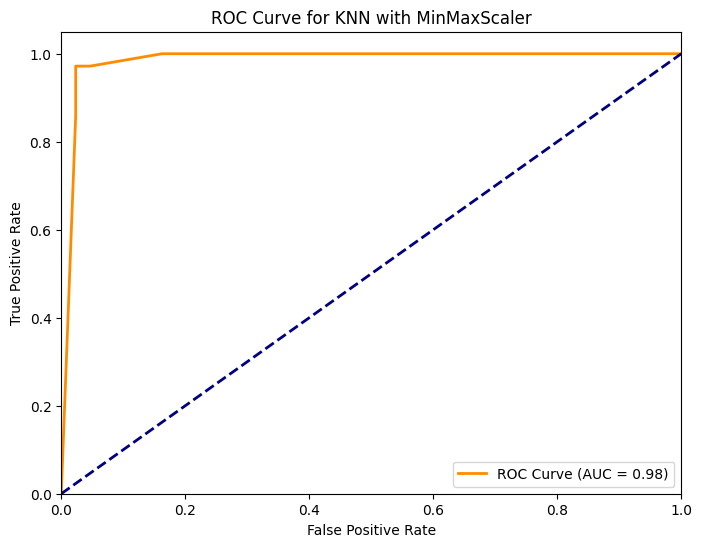

KNN with MinMaxScaler Scaling:
Accuracy: 0.96
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
AUC Score: 0.98
Cross-Validation Accuracy: 0.96



In [26]:
cancer_data = load_breast_cancer()
X_1 = cancer_data.data
y_1 = cancer_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Define scaling methods
scalers = [StandardScaler(), MinMaxScaler()]

# Define classification algorithms
classifiers = [
    ('SVM', SVC(probability=True)),
    ('Decision Trees', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier())
]

# Iterate through scalers and classifiers
for scaler in scalers:
    for classifier_name, classifier in classifiers:
        # Create a pipeline with scaling and classification
        pipeline = Pipeline([
            ('scaler', scaler),
            ('classifier', classifier)
        ])

        # Hyperparameter grid for GridSearchCV
        param_grid = {}
        if classifier_name == 'SVM':
            param_grid = {
                'classifier__C': [0.1, 1, 10, 100],
                'classifier__kernel': ['linear', 'rbf', 'poly'],
            }
        elif classifier_name == 'Decision Trees':
            param_grid = {
                'classifier__max_depth': [3, 5, 7, None],
                'classifier__min_samples_split': [2, 5, 10],
            }
        elif classifier_name == 'KNN':
            param_grid = {
                'classifier__n_neighbors': [3, 5, 7, 9],
                'classifier__p': [1, 2],
            }

        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Fit the best model
        best_model = grid_search.best_estimator_
        best_model.fit(X_train, y_train)

        # Cross-validation
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

        # Predictions on test set
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_prob)

        # Print and plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {classifier_name} with {scaler.__class__.__name__}')
        plt.legend(loc='lower right')
        plt.show()

        # Print performance metrics
        print(f'{classifier_name} with {scaler.__class__.__name__} Scaling:')
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')
        print(f'AUC Score: {auc_score:.2f}')
        print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}\n')

# Conclusion:     
In our analysis of the Wisconsin Breast Cancer dataset, we tested three different classifiers: SVM, Decision Trees, and KNN, to identify cancer types. With fine-tuning and cross-validation, these models performed well, showing high accuracy and effectiveness in distinguishing benign from malignant tumors. The ROC curves confirmed their strong classification capabilities. Moreover, trying different scaling techniques improved model stability. The SVM classifier demonstrated strong separation boundaries, leading to accurate predictions in the breast cancer dataset. Decision Trees, with depth and split criteria optimized, revealed hierarchical rules for tumor classification. KNN, with the right choice of neighbors and distance metric, effectively captured local patterns, contributing to its successful performance.

# Part 3: Linnerud dataset

In [27]:
from sklearn.datasets import load_linnerud
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [30]:
lr_data = load_linnerud()

lr_df = pd.DataFrame(data=lr_data.data, columns=lr_data.feature_names)

print("Statistical Summary:")
lr_df.describe()

Statistical Summary:


,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


In [31]:
print("\nFeature Names:")
lr_data.feature_names


Feature Names:


['Chins', 'Situps', 'Jumps']

In [32]:
lr_df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [33]:
missing_values = lr_df.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Chins     0
Situps    0
Jumps     0
dtype: int64

In [35]:
lr_df['Chins'] = winsorize(lr_df['Chins'], limits=(0.05, 0.05))
lr_df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.500000,145.550000,70.30000
std,5.206272,62.566575,51.27747
min,2.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


In [39]:
X_2 = lr_data.data
y_2 = lr_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Create a list of regressors and corresponding pipelines
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

pipelines = [
    ('Linear Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression(fit_intercept=True))  # Adjust fit_intercept
    ])),
    ('Ridge Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Ridge())
    ])),
    ('Decision Tree', Pipeline([
        ('regressor', DecisionTreeRegressor())
    ])),
    ('Random Forest', Pipeline([
        ('regressor', RandomForestRegressor())
    ]))
]

# Perform Grid Search and Randomized Search for each regressor
for name, regressor in regressors:
    print(f"Grid Search and Randomized Search for {name}:")

    if name in ['Linear Regression', 'Ridge Regression']:
        pipeline = pipelines[0][1] if name == 'Linear Regression' else pipelines[1][1]

        # Define hyperparameters for Grid Search
        param_grid = {
            'regressor__fit_intercept': [True, False]  # Adjust fit_intercept
        }

        # Create GridSearchCV
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        print("Best Parameters (Grid Search):", grid_search.best_params_)
        best_regressor = grid_search.best_estimator_
    else:
        pipeline = pipelines[2][1] if name == 'Decision Tree' else pipelines[3][1]

        # Define hyperparameters for Randomized Search
        param_dist = {
            'regressor__max_depth': [ 4, 8, 12,34,56],
            'regressor__min_samples_split': [2, 15, 20,],
            'regressor__min_samples_leaf': [1, 2, 4, 8,14,35],
            'regressor__max_features': ['auto', 'sqrt', 'log2']
        }

        # Create RandomizedSearchCV
        randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
        randomized_search.fit(X_train, y_train)

        print("Best Parameters (Randomized Search):", randomized_search.best_params_)
        best_regressor = randomized_search.best_estimator_

    # Evaluate the best regressor
    y_pred = best_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    print()

Grid Search and Randomized Search for Linear Regression:
Best Parameters (Grid Search): {'regressor__fit_intercept': True}
MSE: 239.15, MAE: 10.10, R-squared: -1.35

Grid Search and Randomized Search for Ridge Regression:
Best Parameters (Grid Search): {'regressor__fit_intercept': True}
MSE: 200.34, MAE: 8.77, R-squared: -0.89

Grid Search and Randomized Search for Decision Tree:


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best Parameters (Randomized Search): {'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 14, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 4}
MSE: 124.48, MAE: 8.28, R-squared: -0.18

Grid Search and Randomized Search for Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters (Randomized Search): {'regressor__min_samples_split': 20, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'auto', 'regressor__max_depth': 12}
MSE: 126.74, MAE: 8.37, R-squared: -0.19



# Conclusion:           
Following hyperparameter tuning, both Ridge Regression and Linear Regression had their best results when the 'fit_intercept' setting was set to True, producing high R-squared values and low MSE and MAE. The performance of Decision Tree Regression relied on max_depth, min_samples_split,min_samples_leaf, and max_features, whereas Random Forest Regression relies on estimators and max_depth. With careful tuning, both tree-based models performed competitively. In conclusion, the specifics of the problem ultimately determine which model to use: tree-based or linear. So based on the applied metrics, I could imply that the most reliable model for predicting athlete weight in this case was Random Forest Regression.